In [5]:
import sys
sys.path.insert(0, "../")

In [10]:
from cai.dataset.dataset import HPASSDataset
from omegaconf import OmegaConf, DictConfig

cfg = OmegaConf.create({
    "base_dir" : "/mnt/yando/Users/yando/hpa-single-cell-image-classification",
    "phase" : "train",
    "catalog" : "train.csv"
})
dataset = HPASSDataset(cfg)

In [11]:
image, label = dataset[3]

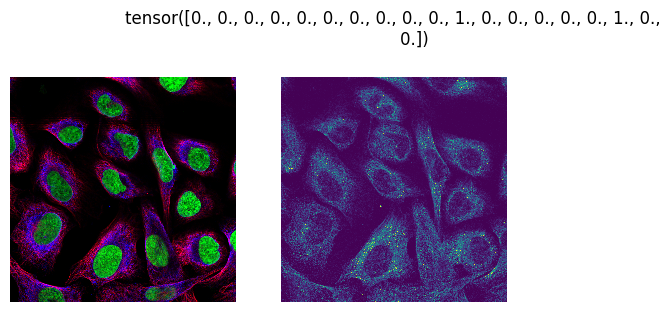

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].matshow(image[[0,2,3]].permute(1,2,0))
ax[1].matshow(image[1])
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.title(label)
plt.show()

In [17]:
# calculate dataset mean, std
import torch

scale = 1.0 / 255.0
num_data = len(dataset)
shapes = [
    [4, 1728, 1728],
    [4, 2048, 2048],
    [4, 3072, 3072]
]
count_shapes = [0] * 3
images_mean = [torch.zeros(shape, dtype=torch.float64) for shape in shapes]
images_var = [torch.zeros(shape, dtype=torch.float64) for shape in shapes]

from tqdm import tqdm

for i in tqdm(range(num_data)):
    image, _ = dataset[i]
    image = (1.0 + (image * scale).to(torch.float64)).log()
    for idx, shape in enumerate(shapes):
        if torch.Size(shape) == image.shape:
            images_mean[idx] += image
            images_var[idx] += image ** 2
            count_shapes[idx] += 1
    if i % 1000 == 0:
        temp1 = torch.sum(torch.stack([image_mean.flatten(1).sum(-1) for image_mean in images_mean]), dim=0)
        temp2 = torch.sum(torch.stack([image_var.flatten(1).sum(-1) for image_var in images_var]), dim=0)
        normalize = ((count_shapes[0] * 1728 ** 2 + count_shapes[1] * 2048 ** 2 + count_shapes[2] * 3072 ** 2))
        print((temp1.log() - torch.tensor(normalize).unsqueeze(0).log()).exp())
        print((temp2.log() - torch.tensor(normalize).unsqueeze(0).log()).exp())
        print(count_shapes)

temp1 = torch.sum(torch.stack([image_mean.flatten(1).sum(-1) for image_mean in images_mean]), dim=0)
temp2 = torch.sum(torch.stack([image_var.flatten(1).sum(-1) for image_var in images_var]), dim=0)
normalize = ((count_shapes[0] * 1728 ** 2 + count_shapes[1] * 2048 ** 2 + count_shapes[2] * 3072 ** 2))
temp1 = (temp1.log() - torch.tensor(normalize).unsqueeze(0).log()).exp()
temp2 = (temp1.log() - torch.tensor(normalize).unsqueeze(0).log()).exp() - temp1 ** 2
print(temp1)
print(temp2)

  0%|          | 1/21806 [00:00<2:00:08,  3.02it/s]

tensor([0.0311, 0.0135, 0.0213, 0.0236], dtype=torch.float64)
tensor([0.0102, 0.0027, 0.0079, 0.0062], dtype=torch.float64)
[0, 1, 0]


  5%|▍         | 1001/21806 [07:16<2:52:51,  2.01it/s]

tensor([0.0641, 0.0436, 0.0396, 0.0623], dtype=torch.float64)
tensor([0.0175, 0.0101, 0.0152, 0.0167], dtype=torch.float64)
[0, 827, 174]


  9%|▉         | 2001/21806 [14:25<2:29:29,  2.21it/s]

tensor([0.0645, 0.0439, 0.0402, 0.0631], dtype=torch.float64)
tensor([0.0175, 0.0101, 0.0155, 0.0168], dtype=torch.float64)
[0, 1656, 345]


 14%|█▍        | 3001/21806 [21:49<2:15:23,  2.31it/s]

tensor([0.0641, 0.0440, 0.0398, 0.0627], dtype=torch.float64)
tensor([0.0174, 0.0101, 0.0154, 0.0167], dtype=torch.float64)
[0, 2475, 526]


 18%|█▊        | 4001/21806 [29:10<2:04:34,  2.38it/s]

tensor([0.0636, 0.0442, 0.0396, 0.0624], dtype=torch.float64)
tensor([0.0173, 0.0102, 0.0152, 0.0166], dtype=torch.float64)
[0, 3298, 702]


 23%|██▎       | 5001/21806 [36:23<2:19:28,  2.01it/s]

tensor([0.0639, 0.0441, 0.0395, 0.0627], dtype=torch.float64)
tensor([0.0174, 0.0101, 0.0151, 0.0167], dtype=torch.float64)
[0, 4135, 864]


 28%|██▊       | 6001/21806 [43:47<2:24:32,  1.82it/s]

tensor([0.0633, 0.0437, 0.0393, 0.0623], dtype=torch.float64)
tensor([0.0172, 0.0100, 0.0150, 0.0166], dtype=torch.float64)
[0, 4955, 1042]


 32%|███▏      | 7001/21806 [51:11<1:54:08,  2.16it/s]

tensor([0.0634, 0.0436, 0.0394, 0.0623], dtype=torch.float64)
tensor([0.0172, 0.0100, 0.0150, 0.0166], dtype=torch.float64)
[0, 5787, 1210]


 37%|███▋      | 8001/21806 [58:29<1:35:53,  2.40it/s]

tensor([0.0632, 0.0437, 0.0394, 0.0622], dtype=torch.float64)
tensor([0.0171, 0.0100, 0.0151, 0.0166], dtype=torch.float64)
[0, 6608, 1389]


 41%|████▏     | 9001/21806 [1:05:44<1:24:07,  2.54it/s]

tensor([0.0633, 0.0436, 0.0395, 0.0624], dtype=torch.float64)
tensor([0.0172, 0.0100, 0.0152, 0.0167], dtype=torch.float64)
[0, 7463, 1533]


 46%|████▌     | 10001/21806 [1:13:15<1:26:58,  2.26it/s]

tensor([0.0629, 0.0432, 0.0393, 0.0620], dtype=torch.float64)
tensor([0.0171, 0.0099, 0.0151, 0.0166], dtype=torch.float64)
[0, 8253, 1743]


 50%|█████     | 11001/21806 [1:20:45<1:15:16,  2.39it/s]

tensor([0.0629, 0.0432, 0.0392, 0.0621], dtype=torch.float64)
tensor([0.0171, 0.0099, 0.0150, 0.0166], dtype=torch.float64)
[0, 9071, 1925]


 55%|█████▌    | 12001/21806 [1:28:13<1:09:52,  2.34it/s]

tensor([0.0627, 0.0432, 0.0391, 0.0620], dtype=torch.float64)
tensor([0.0170, 0.0099, 0.0150, 0.0166], dtype=torch.float64)
[0, 9882, 2114]


 60%|█████▉    | 13001/21806 [1:35:35<1:02:42,  2.34it/s]

tensor([0.0627, 0.0433, 0.0392, 0.0621], dtype=torch.float64)
tensor([0.0170, 0.0099, 0.0151, 0.0166], dtype=torch.float64)
[0, 10709, 2287]


 64%|██████▍   | 14001/21806 [1:43:00<1:01:13,  2.12it/s]

tensor([0.0628, 0.0433, 0.0393, 0.0622], dtype=torch.float64)
tensor([0.0170, 0.0099, 0.0151, 0.0167], dtype=torch.float64)
[0, 11542, 2454]


 69%|██████▉   | 15001/21806 [1:50:25<46:34,  2.43it/s]  

tensor([0.0626, 0.0433, 0.0392, 0.0621], dtype=torch.float64)
tensor([0.0170, 0.0099, 0.0151, 0.0166], dtype=torch.float64)
[0, 12366, 2629]


 73%|███████▎  | 16001/21806 [1:57:48<50:20,  1.92it/s]  

tensor([0.0626, 0.0432, 0.0392, 0.0620], dtype=torch.float64)
tensor([0.0170, 0.0099, 0.0151, 0.0166], dtype=torch.float64)
[0, 13195, 2799]


 78%|███████▊  | 17001/21806 [2:05:10<37:52,  2.11it/s]

tensor([0.0625, 0.0432, 0.0391, 0.0620], dtype=torch.float64)
tensor([0.0170, 0.0099, 0.0150, 0.0166], dtype=torch.float64)
[0, 14017, 2976]


 83%|████████▎ | 18001/21806 [2:12:26<32:48,  1.93it/s]

tensor([0.0626, 0.0433, 0.0391, 0.0621], dtype=torch.float64)
tensor([0.0170, 0.0099, 0.0150, 0.0166], dtype=torch.float64)
[0, 14855, 3138]


 87%|████████▋ | 19001/21806 [2:19:51<19:12,  2.43it/s]

tensor([0.0624, 0.0432, 0.0390, 0.0619], dtype=torch.float64)
tensor([0.0169, 0.0099, 0.0150, 0.0166], dtype=torch.float64)
[0, 15657, 3336]


 92%|█████████▏| 20001/21806 [2:27:11<16:02,  1.88it/s]

tensor([0.0624, 0.0432, 0.0390, 0.0619], dtype=torch.float64)
tensor([0.0169, 0.0099, 0.0150, 0.0166], dtype=torch.float64)
[0, 16484, 3509]


 96%|█████████▋| 21001/21806 [2:34:39<05:54,  2.27it/s]

tensor([0.0624, 0.0432, 0.0389, 0.0618], dtype=torch.float64)
tensor([0.0169, 0.0099, 0.0149, 0.0166], dtype=torch.float64)
[0, 17293, 3699]


100%|██████████| 21806/21806 [2:40:32<00:00,  2.26it/s]

tensor([0.0624, 0.0432, 0.0389, 0.0619], dtype=torch.float64)
tensor([-0.0039, -0.0019, -0.0015, -0.0038], dtype=torch.float64)


In [26]:
import numpy as np
mu_log_x = np.array([0.0624, 0.0432, 0.0389, 0.0619])
var_log_x = np.array([0.0130, 0.0081, 0.0134, 0.0128])

In [29]:
np.sqrt(var_log_x)

array([0.11401754, 0.09      , 0.11575837, 0.11313708])

In [27]:
mu = np.exp(mu_log_x) -1
var = var_log_x / (mu+1) ** 2
print(mu, var)

[0.06438801 0.0441467  0.03966651 0.06374957] [0.01147475 0.00742954 0.012397   0.01131179]


In [28]:
np.sqrt(var)

array([0.10712028, 0.08619478, 0.11134183, 0.10635688])